In [ ]:
# !if [ -d dul_2021 ]; then rm -Rf dul_2021; fi
# !git clone https://github.com/GrigoryBartosh/dul_2021
# !pip install ./dul_2021

Cloning into 'dul_2021'...
remote: Enumerating objects: 348, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 348 (delta 100), reused 87 (delta 63), pack-reused 171
Receiving objects: 100% (348/348), 55.81 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Processing ./dul_2021
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for dul-2021: filename=dul_2021-0.1.0-py3-none-any.whl size=26875 sha256=ec8b4be35260cc12ee60889eed6b61c38329e20e0e95ac771560a7124c47f511
  Stored in directory: /tmp/pip-ephem-wheel-cache-9dqi43ft/wheels/55/59/29/0fb1c6356521

In [1]:
from utils.hw11_utils import *
from torch.utils.data import DataLoader

from src.byol import BYOL

device = 'cuda'

# Question 1. BYOL

Here we will implement [BYOL](https://arxiv.org/abs/2006.07733).

* You can combine view, representation, and projection into one network. You can use same architechure as in practice. 

* Use BatchNorm

* As predictor use few linear layers

* Dataset comes untransformed, so you need to apply transformations during training by yourself. Use same augmentations as in SimCLR

**Hyperparameters**

* τ = 0.99 (target update coefficient)
* lr = 1e-4
* num_epochs = 20
* latent dim = 128



**You will provide the following deliverables**


1. Over the course of training, record loss ber batch.
2. A function that encodes a batch of images with your trained model. The function recieves a batch torch tensors on cpu and should return transformed 2d tensor (batch size x laten dim). It will be used to test representation on classification task.

In [2]:
def q1(train_data):
    """
    train_data: An (n_train, 1, 28, 28) torchvision dataset of MNIST images with values from -1 to 1

    Returns
    - a (# of training iterations, ) numpy array  losses on each iteration
    - a function that transforms batch of images into their latent representation
    """
    trainloader = DataLoader(train_data, batch_size=256, shuffle=True)
    model = BYOL().to(device)

    losses = model.fit(trainloader, epochs=20, lr=1e-4)

    return losses, model.encode

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

Training...:   0%|          | 0/235 [00:00<?, ?it/s]

mean classification accuracy=0.6030


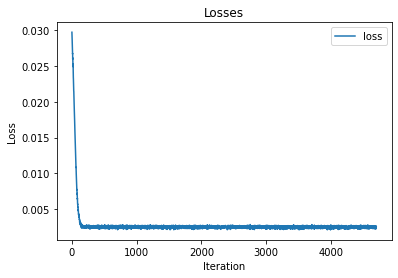

In [3]:
# change flag to False if you want only to test your losses w/o accuracy (it takes around 4-5 minutes)
q1_results(q1, True)

# Question 2. Barlow Twins

Here we will implement [barlow twins](https://arxiv.org/abs/2103.03230).

* You can use same architechure as in practice. 

* Dataset comes untransformed, so you need to apply transformations during training by yourself. Use same augmentations as in SimCLR

**Hyperparameters**

* λ = 0.01 
* lr = 5e-4
* num_epochs = 20
* latent dim = 128



**You will provide the following deliverables**


1. Over the course of training, record loss ber batch.
2. A function that encodes a batch of images with your trained model. The function recieves a batch torch tensors on cpu and should return transformed 2d tensor (batch size x laten dim). It will be used to test representation on classification task.

In [2]:
from src.btwins import BTWINS

In [4]:
def q2(train_data, test_data):
    """
    train_data: An (n_train, 1, 32, 32) torchvision dataset of CIFAR10 images with values from -1 to 1

    Returns
    - a (# of training iterations, ) numpy array  losses on each iteration
    - a function that transforms batch of images into their latent representation
    """
    batch_size = 256
    lr = 5e-4
    epochs = 20
    trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    model = BTWINS().to(device)

    losses = model.fit(trainloader, epochs=epochs, lr=lr)

    return losses, model.encode

Files already downloaded and verified
Files already downloaded and verified


Training...: 100%|██████████| 196/196 [00:20<00:00,  9.73it/s, epoch=19]


mean classification accuracy=0.3579


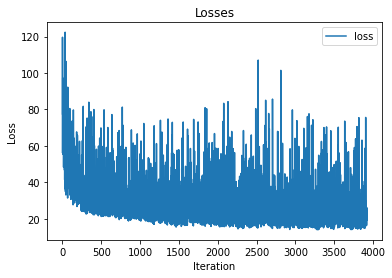

In [5]:
# change flag to False if you want only to test your losses w/o accuracy (it takes around 4-5 minutes)
q2_results(q2, True)

# Bonus. SwAV

Here we will implement [SwAV](https://arxiv.org/abs/2006.09882v5)

**You will provide the following deliverables**


1. Over the course of training, record loss ber batch.
2. A function that encodes a batch of images with your trained model. The function recieves a batch torch tensors on cpu and should return transformed 2d tensor (batch size x laten dim). It will be used to test representation on classification task.

In [ ]:
def b(train_data):
    """
    train_data: An (n_train, 1, 32, 32) torchvision dataset of CIFAR10 images with values from -1 to 1

    Returns
    - a (# of training iterations, ) numpy array  losses on each iteration
    - a function that transforms batch of images into their latent representation
    """

In [ ]:
q2_results(b, True)